In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
import nltk
nltk.download('stopwords')
nltk.download('punkt')  
from nltk.tokenize import word_tokenize         #breaks text into words
from nltk.stem import PorterStemmer             #convert root into base form
from nltk.corpus import stopwords               #removes stopwords such as is, in, the
stop_word = set(stopwords.words('english'))
from wordcloud import WordCloud                 #Size of each word display frequency
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Dell/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv(r'D:\.1--MCA--MSU--\MCA_SEM_3\Machine Learning\Twitter Sentiment Analysis\twitter_data.csv')

### Sentiment Analysis on covid vaccines


In [3]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10340 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [5]:
df.isnull().sum()

id                     0
user_name              0
user_location       2270
user_description     680
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [6]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [7]:
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'], axis = 1)

In [8]:
text_df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [9]:
print(text_df['text'].iloc[0])
print(text_df['text'].iloc[1])

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm


In [10]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11020 non-null  object
dtypes: object(1)
memory usage: 86.2+ KB


In [11]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '', text, flags = re.MULTILINE)           #removes link
    text = re.sub(r'\@w+|\#', '', text)                                                 #removes @ and #
    text = re.sub(r'[^\w\s]', '', text)                                                 #removes not a word character whitespace 
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_word]
    return " ".join(filtered_text)

In [12]:
text_df.text = text_df['text'].apply(data_processing)


In [13]:
text_df = text_df.drop_duplicates('text')

### Using Porter Stemmer

In [14]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [15]:
text_df['text'] = text_df['text'].apply(lambda x : stemming(x))

In [16]:
text_df.head()

,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...


In [17]:
print(text_df['text'].iloc[0])
print(text_df['text'].iloc[1])

folks said daikon paste could treat cytokine storm pfizerbiontech
world wrong side history year hopefully biggest vaccination effort weve ev


In [18]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10543 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10543 non-null  object
dtypes: object(1)
memory usage: 164.7+ KB


In [19]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [20]:
text_df['polarity'] = text_df['text'].apply(polarity)


In [21]:
text_df.head()

,text,polarity
0,folks said daikon paste could treat cytokine s...,0.0
1,world wrong side history year hopefully bigges...,-0.5
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0
3,facts immutable senator even youre ethically s...,0.1
4,explain need vaccine borisjohnson matthancock ...,0.0


In [22]:
def sentiment(label):
    if label < 0 :
        return "Negative"
    elif label == 0 :
        return "Netural"
    elif label > 0:
        return "Positive"
        

In [23]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [24]:
text_df.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Netural
1,world wrong side history year hopefully bigges...,-0.5,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Netural
3,facts immutable senator even youre ethically s...,0.1,Positive
4,explain need vaccine borisjohnson matthancock ...,0.0,Netural


<Axes: xlabel='sentiment', ylabel='count'>

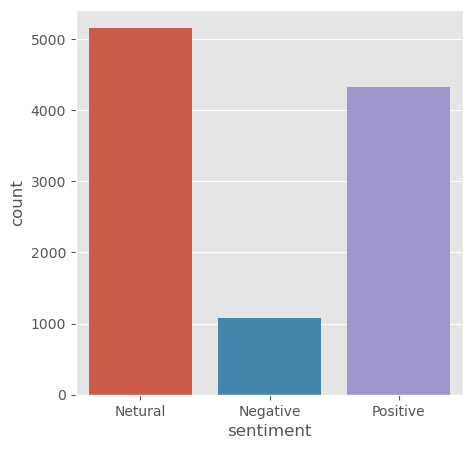

In [25]:
fig = plt.figure(figsize = (5,5))
sns.countplot(x = 'sentiment', data = text_df)

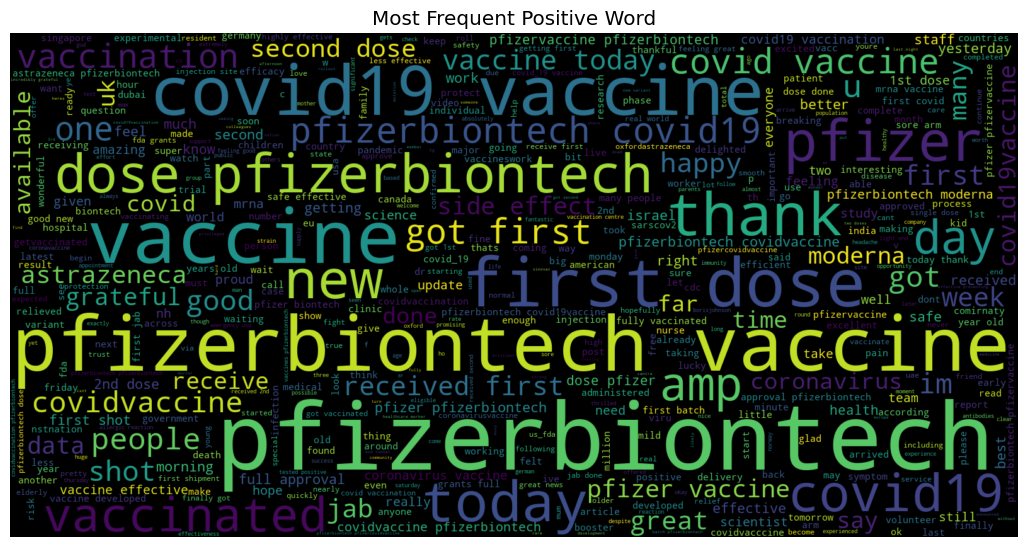

In [26]:
postive_tweet = text_df[text_df.sentiment == "Positive"]
postive_tweet = postive_tweet.sort_values(['polarity'], ascending = False)

text = " ".join([word for word in postive_tweet['text']])

plt.figure(figsize = (13,8), facecolor = 'None')
wordcloud = WordCloud(max_words = 500, width = 1600, height = 800).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("Most Frequent Positive Word")
plt.show()

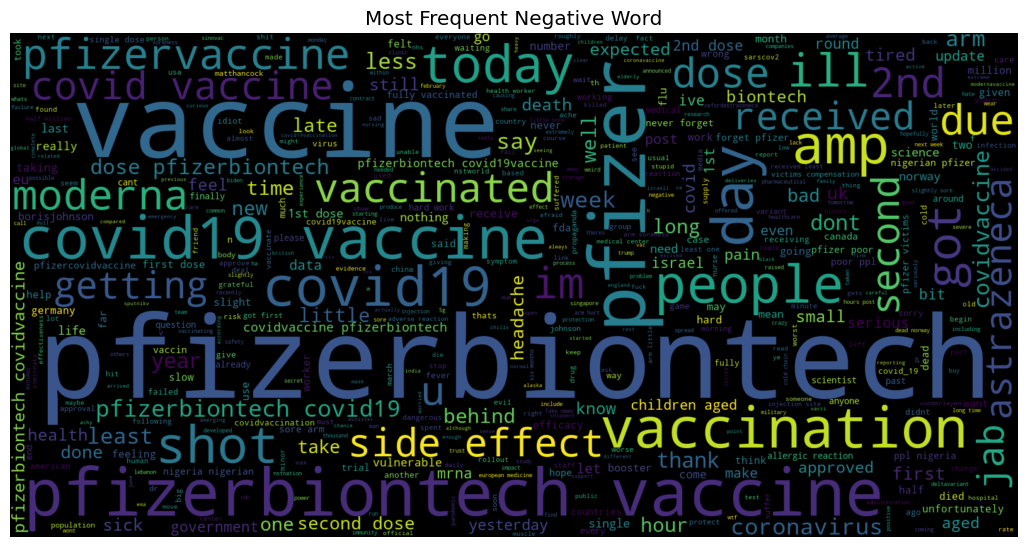

In [27]:
negative_tweet = text_df[text_df.sentiment == "Negative"]
negative_tweet = negative_tweet.sort_values(['polarity'], ascending = False)

text = " ".join([word for word in negative_tweet['text']])

plt.figure(figsize = (13,8), facecolor = 'None')
wordcloud = WordCloud(max_words = 500, width = 1600, height = 800).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("Most Frequent Negative Word")
plt.show()

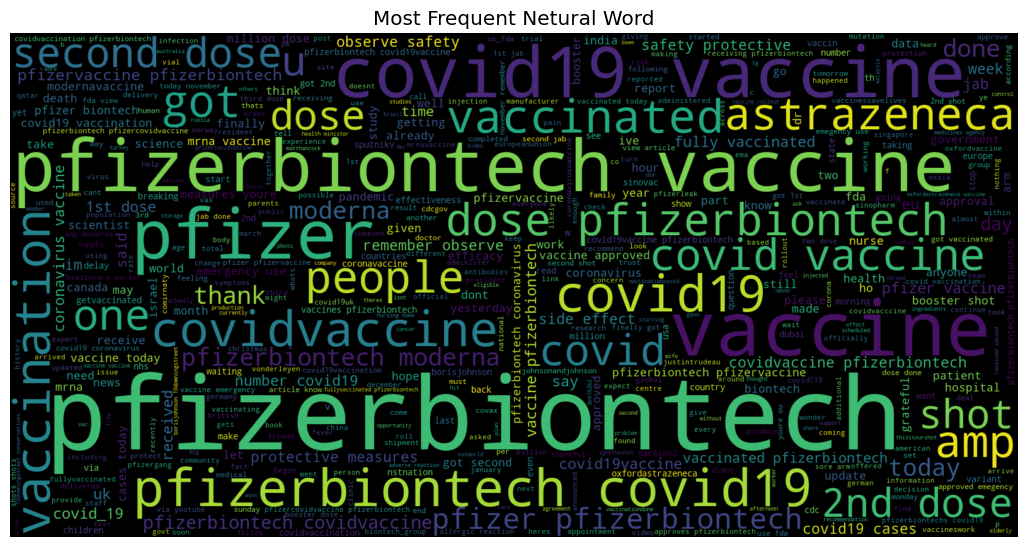

In [28]:
netural_tweet = text_df[text_df.sentiment == "Netural"]
netural_tweet = netural_tweet.sort_values(['polarity'], ascending = False)

text = " ".join([word for word in netural_tweet['text']])

plt.figure(figsize = (13,8), facecolor = 'None')
wordcloud = WordCloud(max_words = 500, width = 1600, height = 800).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("Most Frequent Netural Word")
plt.show()

In [29]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])



In [30]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 78583

First 20 features:
 ['000' '000 doses' '000 initial' '000 people' '000 vaccines' '0000001'
 '0000001 covid19' '0011' '0011 abt' '004' '004 covid' '004 israelis' '01'
 '01 getting' '01 june' '01 november' '01aug2021' '01aug2021 doublevaxxed'
 '02' '02 175']


In [31]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [33]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_accuracy = accuracy_score(log_reg_pred, y_test)
print("Model Accuracy : {:2f}%" .format(log_reg_accuracy*100))

Model Accuracy : 84.637269%


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
print(confusion_matrix(y_test, log_reg_pred))
print("\n")
print(classification_report(y_test, log_reg_pred))

[[  72  116   38]
 [   4 1008    9]
 [   8  149  705]]


              precision    recall  f1-score   support

    Negative       0.86      0.32      0.46       226
     Netural       0.79      0.99      0.88      1021
    Positive       0.94      0.82      0.87       862

    accuracy                           0.85      2109
   macro avg       0.86      0.71      0.74      2109
weighted avg       0.86      0.85      0.83      2109



In [36]:
from sklearn.svm import LinearSVC

SVC_model = LinearSVC()
SVC_model.fit(x_train, y_train)


LinearSVC()

In [37]:
SVC_pred = SVC_model.predict(x_test)
SVC_acc = accuracy_score(SVC_pred, y_test)
print("Test Accuracy : {:.2f}%". format(SVC_acc*100))

Test Accuracy : 87.34%


In [38]:
print(confusion_matrix(y_test, SVC_pred))
print("\n")
print(classification_report(y_test, SVC_pred))

[[ 101   91   34]
 [   6 1007    8]
 [  14  114  734]]


              precision    recall  f1-score   support

    Negative       0.83      0.45      0.58       226
     Netural       0.83      0.99      0.90      1021
    Positive       0.95      0.85      0.90       862

    accuracy                           0.87      2109
   macro avg       0.87      0.76      0.79      2109
weighted avg       0.88      0.87      0.87      2109

